# Ultimate Data Science Challenge!

This notebook will be solving the problems featured in the Sprignboard Ultimate Data Science Challenge.

## Part 1: Exploratory Data Analysis

In [1]:
# Begin by importing the packages and file.
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime

with open(r'C:\Users\joshu\Downloads\1481053515_ultimate_challenge\ultimate_challenge\logins.json') as f:
    data = json.load(f)

In [2]:
# Look at the keys
data.keys()

dict_keys(['login_time'])

In [3]:
# Convert the dictionary into a pandas dataframe.
df = pd.DataFrame(data)

In [4]:
# Check the first and last dates of the date range
df.iloc[0,0], df.iloc[-1,0]

('1970-01-01 20:13:18', '1970-04-13 18:54:23')

In [5]:
# Convert the login time into datetime format.
df.login_time = pd.to_datetime(df.login_time)
# Check to see if it converted correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
# Create an empty dictionary to hold the data
time_dict = {'time':[], 'frequency':[]}
# Create empty variable that will keep count of the aggregates
freq = 0
# Set the initial time to the first time in the dataset
time = df.iloc[0,0]

# Create a for-loop that will check whether the login time is within 15 minutes of the given time range
for x in df.login_time:
    if x <= time + datetime.timedelta(minutes=15):
        freq += 1
        continue        
    else: 
        time_dict['time'].append(time)
        time_dict['frequency'].append(freq)
        freq = 0
        time = time + datetime.timedelta(minutes=15)

In [7]:
# Rearrange the ordering of the dataframe so that it includes time first

time_df = pd.DataFrame(data=time_dict['time'])
time_df['frequency'] = pd.DataFrame(data=time_dict['frequency'])
time_df.columns = ['time', 'frequency']
time_df.set_index('time', inplace=True)
time_df.head()

,frequency
time,
1970-01-01 20:13:18,7
1970-01-01 20:28:18,1
1970-01-01 20:43:18,12
1970-01-01 20:58:18,1
1970-01-01 21:13:18,3


Now that we have aggregated the login counts based on 15-minute intervals, let's visualize the login counts in a time series.

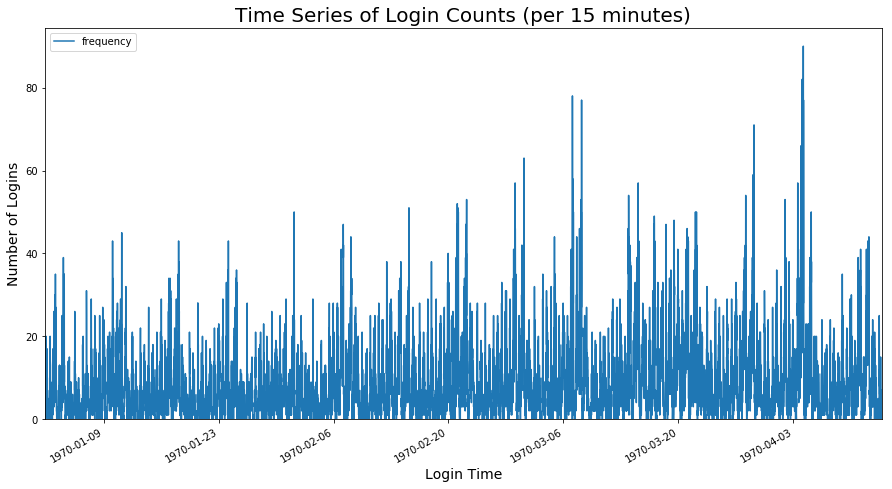

In [8]:
# Create a basic plot using the login times as the independent variable and the number of logins as the dependent variable.
time_df.plot.line(figsize = (15,8))
plt.xlabel('Login Time', fontsize=14)
plt.ylabel('Number of Logins', fontsize=14)
plt.title('Time Series of Login Counts (per 15 minutes)', fontsize = 20)
plt.ylim(0)
plt.show()

This is hard to draw conclusions from since there are too many data points to fit in a single plot. 

To get a better understanding, let's use moving average calculations to make the plot smoother.

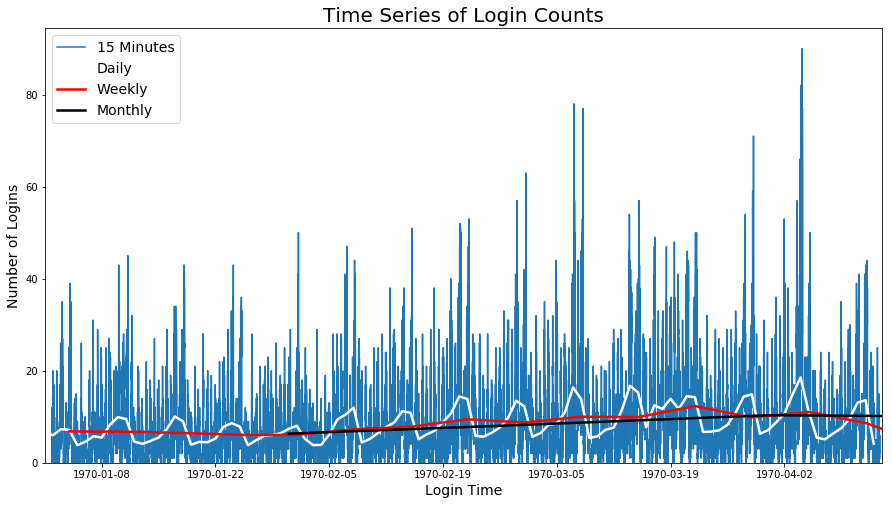

In [9]:
# Use matplotlib's plot function in order to plot all 3 rolling windows into 1 plot
plt.figure(figsize=(15, 8))
plt.plot(time_df)
plt.plot(time_df.groupby(pd.Grouper(freq='D')).mean(), linewidth = 2.5, color = 'white') # Daily cycle
plt.plot(time_df.groupby(pd.Grouper(freq='W')).mean(), linewidth = 2.5, color = 'red') # Weekly cycle
plt.plot(time_df.groupby(pd.Grouper(freq='M')).mean(), linewidth = 2.5, color = 'black') # Monthly cycle
plt.xlabel('Login Time', fontsize=14)
plt.ylabel('Number of Logins', fontsize=14)
plt.xlim(['1970-01', '1970-04-14']) # This will prevent the plot from showing all the way until the end of the month
plt.ylim(0)
plt.title('Time Series of Login Counts', fontsize=20);
plt.legend(['15 Minutes', 'Daily', 'Weekly', 'Monthly'], fontsize=14);

The number of login counts has overall been increasing over time, which is seen most evidently in the monthly rolling average. 

We can also see that the peaks are growing larger over time. From observing the daily and 15-minute rolling averages, the maximum number of login counts in each time-frame increases over time. 

Let's take a closer look at the daily and weekly rolling averages.

In [10]:
# Taking a look at the top 10 days with most login counts
time_df.groupby(pd.Grouper(freq='D')).mean().sort_values(by='frequency', ascending = False).head(10)

,frequency
time,
1970-04-04,18.552083
1970-03-14,16.729167
1970-03-07,16.375000
1970-03-15,15.281250
1970-03-29,14.895833
1970-04-03,14.781250
1970-03-21,14.468750
1970-02-21,14.427083
1970-03-28,14.385417


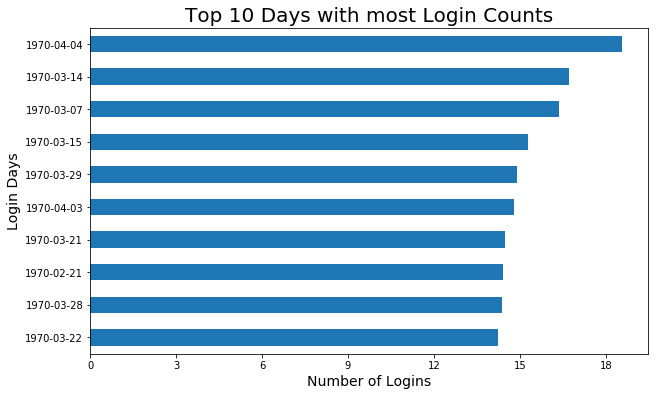

In [11]:
# Create a DataFrame containing the top 10 days with most login counts
top_daily = time_df.groupby(pd.Grouper(freq='D')).mean().sort_values(by='frequency').tail(10)

# Create a list to contain just the dates and not the times
daily_list = []
for x in top_daily.index:
    x = str(x)
    daily_list.append(x[0:10])
daily_list

# Plot the dataframe
top_daily.plot(kind='barh', figsize = (10,6), legend = False)
plt.title('Top 10 Days with most Login Counts', fontsize = 20)
plt.xticks(range(0,21,3), range(0,21,3))
plt.yticks(range(10), daily_list)
plt.xlabel('Number of Logins', fontsize = 14)
plt.ylabel('Login Days', fontsize = 14)
plt.show()

As we can see, 9 of the top 10 busiest days (in traffic) occured in March and April, further showing how the number of login counts have increased over time. 

Of course one could argue that this only indicates that the *peaks* of logins have increased, so we will now observe which weeks had the largest number of logins as well.

In [12]:
# Taking a look at the top 6 weeks with most login counts
time_df.groupby(pd.Grouper(freq='W')).mean().sort_values(by='frequency', ascending = False).head(5)

,frequency
time,
1970-03-22,12.322917
1970-04-05,11.040179
1970-03-08,10.011905
1970-03-15,9.919643
1970-03-29,9.848214


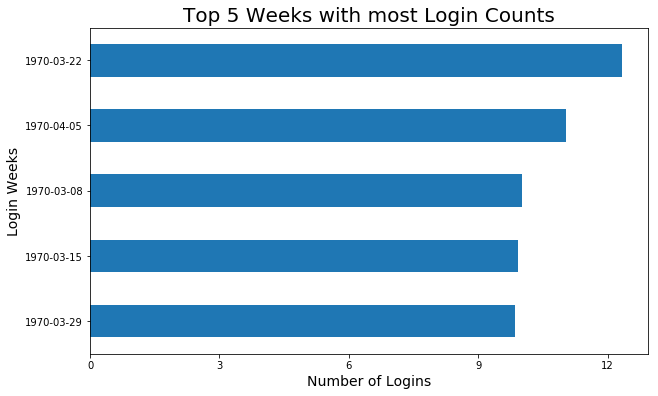

In [13]:
# Create a DataFrame containing the top 6 weeks with most login counts
top_weekly = time_df.groupby(pd.Grouper(freq='W')).mean().sort_values(by='frequency').tail(5)

# Create a list to contain just the dates and not the times
weekly_list = []
for x in top_weekly.index:
    x = str(x)
    weekly_list.append(x[0:10])
weekly_list

# Plot the dataframe
top_weekly.plot(kind='barh', figsize = (10,6), legend = False)
plt.title('Top 5 Weeks with most Login Counts', fontsize = 20)
plt.xticks(range(0,15,3), range(0,15,3))
plt.yticks(range(5), weekly_list)
plt.xlabel('Number of Logins', fontsize = 14)
plt.ylabel('Login Weeks', fontsize = 14)
plt.show()

All the top 5 weeks with most login counts were part of March and April, solidifying the previous sentiment that the number of visitors has grown over time. 